# Theoritacal questions

### **1. What does R-squared represent in a regression model?**

**Ans:** R² shows the proportion of variance in the dependent variable explained by the independent variables. It ranges from 0 to 1.

---

### **2. What are the assumptions of linear regression?**

**Ans:**

* Linearity
* Independence of errors
* Homoscedasticity
* Normality of residuals
* No multicollinearity

---

### **3. What is the difference between R-squared and Adjusted R-squared?**

**Ans:** R² increases with added variables. Adjusted R² adjusts for the number of predictors and penalizes irrelevant variables.

---

### **4. Why do we use Mean Squared Error (MSE)?**

**Ans:** MSE quantifies the average squared difference between predicted and actual values. It's useful for measuring model accuracy.

---

### **5. What does an Adjusted R-squared value of 0.85 indicate?**

**Ans:** It means that **85% of the variance** in the dependent variable is explained by the model, **adjusted for the number of predictors**.

---

### **6. How do we check for normality of residuals in linear regression?**

**Ans:**

* Histogram or Q-Q plot of residuals
* Shapiro-Wilk or Kolmogorov-Smirnov test

---

### **7. What is multicollinearity, and how does it impact regression?**

**Ans:** Multicollinearity is when independent variables are highly correlated. It leads to unstable coefficients and reduces model interpretability.

---

### **8. What is Mean Absolute Error (MAE)?**

**Ans:** MAE is the average of absolute differences between actual and predicted values. It gives a linear penalty to errors.

---

### **9. What are the benefits of using an ML pipeline?**

**Ans:**

* Automates preprocessing and modeling
* Ensures reproducibility
* Reduces code complexity
* Prevents data leakage

---

### **10. Why is RMSE considered more interpretable than MSE?**

**Ans:** RMSE is in the same units as the target variable, unlike MSE which is squared, making it easier to interpret.

---

### **11. What is pickling in Python, and how is it useful in ML?**

**Ans:** Pickling serializes Python objects (like trained models) into files. It allows saving and reusing models without retraining.

---

### **12. What does a high R-squared value mean?**

**Ans:** It indicates a good fit—most of the variation in the dependent variable is explained by the model.

---

### **13. What happens if linear regression assumptions are violated?**

**Ans:** Violations can lead to biased estimates, unreliable predictions, and invalid statistical tests.

---

### **14. How can we address multicollinearity in regression?**

**Ans:**

* Remove highly correlated predictors
* Use PCA or regularization (e.g., Ridge/Lasso)

---

### **15. How can feature selection improve model performance in regression analysis?**

**Ans:** It removes irrelevant or redundant features, reducing overfitting and improving interpretability and speed.

---

### **16. How is Adjusted R-squared calculated?**

**Ans:**

$$
\text{Adjusted } R^2 = 1 - \left(\frac{(1 - R^2)(n - 1)}{n - p - 1}\right)
$$

Where *n* = number of observations, *p* = number of predictors.

---

### **17. Why is MSE sensitive to outliers?**

**Ans:** Because errors are squared, large errors (outliers) get amplified disproportionately, impacting the metric heavily.

---

### **18. What is the role of homoscedasticity in linear regression?**

**Ans:** Homoscedasticity (equal variance of residuals) ensures valid standard errors and hypothesis testing.

---

### **19. What is Root Mean Squared Error (RMSE)?**

**Ans:** It’s the square root of MSE. It represents the average prediction error in the original units of the dependent variable.

---

### **20. Why is pickling considered risky?**

**Ans:** Pickled files can execute arbitrary code if tampered with, making them vulnerable to security risks if loaded from untrusted sources.

---

### **21. What alternatives exist to pickling for saving ML models?**

**Ans:**

* `joblib` (safer for large models)
* `ONNX` (cross-platform)
* `PMML`
* `TensorFlow SavedModel` / `PyTorch .pt` format

---

### **22. What is heteroscedasticity, and why is it a problem?**

**Ans:** It means residuals have non-constant variance. It violates regression assumptions and can lead to inefficient and biased estimates.

---

### **23. How can interaction terms enhance a regression model's predictive power?**

**Ans:** They allow the model to capture combined effects of variables, revealing relationships not detected by individual terms alone.

---


# Practical Questions

C:\Users\prakh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


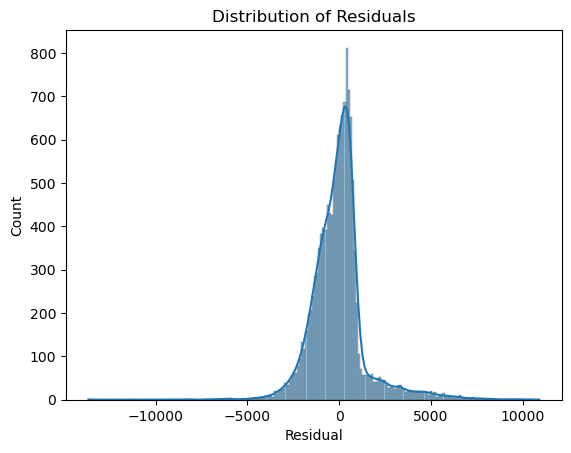

In [1]:
## Q1. Visualize residuals distribution with Seaborn's "diamonds" dataset

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load dataset
diamonds = sns.load_dataset('diamonds')

# Select features and target (use carat to predict price)
X = diamonds[['carat']]
y = diamonds['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit model
model = LinearRegression().fit(X_train, y_train)

# Predict and calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals distribution
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.show()

In [2]:
## Q2. Calculate and print MSE, MAE, RMSE for linear regression

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming y_test and y_pred are defined from previous script

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 2379576.90
MAE: 1008.29
RMSE: 1542.59


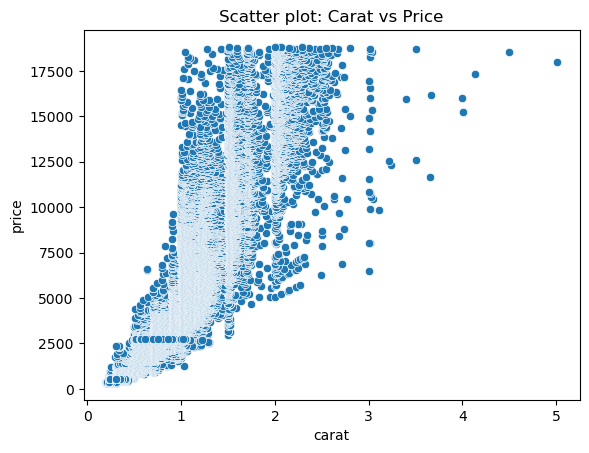

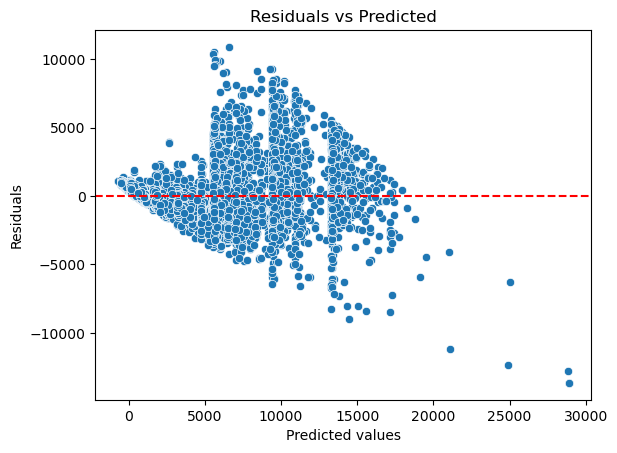

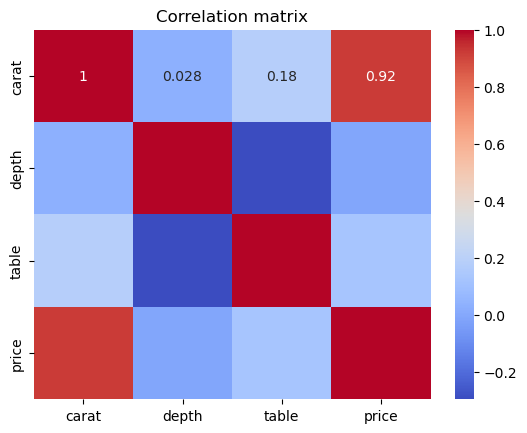

In [3]:
## Q3. Check assumptions: scatter plot (linearity), residuals plot (homoscedasticity), correlation matrix (multicollinearity)

import seaborn as sns
import matplotlib.pyplot as plt

# Linearity: scatter plot of X vs y
sns.scatterplot(x=X['carat'], y=y)
plt.title('Scatter plot: Carat vs Price')
plt.show()

# Residual plot (homoscedasticity)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# Correlation matrix (for multicollinearity)
corr_matrix = diamonds[['carat', 'depth', 'table', 'price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [4]:
## Q4. ML pipeline with feature scaling and model evaluation

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']

models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-scores)
    print(f"{name} RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")


LinearRegression RMSE: 1632.78 ± 988.43
DecisionTree RMSE: 2288.97 ± 1581.49
RandomForest RMSE: 2057.54 ± 1495.47


In [5]:
## Q5. Simple linear regression: coefficients, intercept, R-squared

from sklearn.metrics import r2_score

# Using carat and price
model = LinearRegression().fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))


Coefficients: [7858.77050994 -151.23634689 -104.47278016]
Intercept: 13003.440524239842
R-squared: 0.8536762884061408


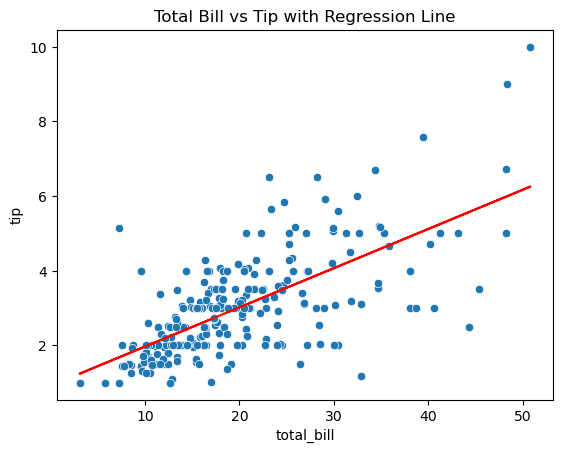

In [6]:
# Q6. Analyze total bill and tip from 'tips' dataset (simple linear regression + visualization)

tips = sns.load_dataset('tips')
X = tips[['total_bill']]
y = tips['tip']

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.plot(tips['total_bill'], y_pred, color='red')
plt.title('Total Bill vs Tip with Regression Line')
plt.show()


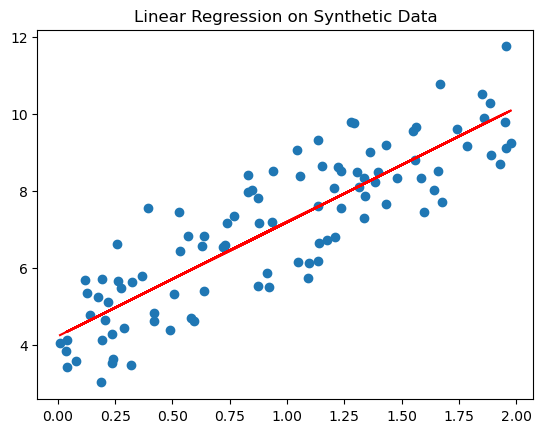

In [7]:
## Q7. Fit linear regression on synthetic dataset; plot data and regression line

import numpy as np

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('Linear Regression on Synthetic Data')
plt.show()

In [8]:
## Q8. Pickle a trained linear regression model

import pickle

# Assuming model is trained
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)


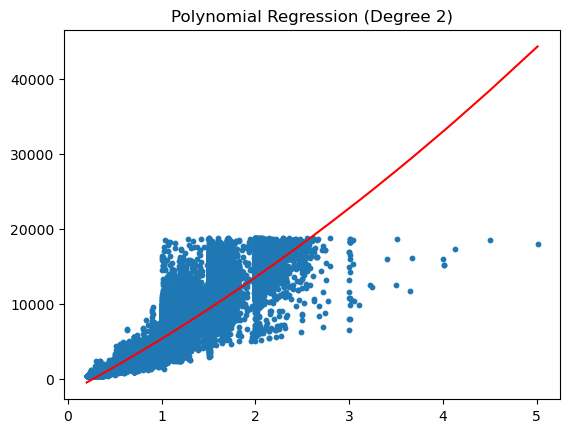

In [9]:
## Q9. Polynomial regression (degree 2) and plot curve

from sklearn.preprocessing import PolynomialFeatures

X = diamonds[['carat']]
y = diamonds['price']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y, s=10)
sorted_idx = X['carat'].argsort()
plt.plot(X.iloc[sorted_idx], y_pred[sorted_idx], color='red')
plt.title('Polynomial Regression (Degree 2)')
plt.show()


In [10]:
## Q10. Generate synthetic data for simple linear regression; print coefficient and intercept

np.random.seed(42)
X = 5 * np.random.rand(100, 1)
y = 2 + 3 * X + np.random.randn(100, 1)

model = LinearRegression().fit(X, y)
print("Coefficient:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

Coefficient: 2.9080453545753935
Intercept: 2.215096157546747


In [11]:
## Q11. Fit polynomial regression models of different degrees and compare performance

from sklearn.metrics import mean_squared_error

degrees = [1, 2, 3, 4]
for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    print(f"Degree {deg} Polynomial Regression MSE: {mse:.2f}")

Degree 1 Polynomial Regression MSE: 0.81
Degree 2 Polynomial Regression MSE: 0.78
Degree 3 Polynomial Regression MSE: 0.77
Degree 4 Polynomial Regression MSE: 0.76


In [12]:
## Q12. Simple linear regression with two features; print coefficients, intercept, R-squared

X_two = diamonds[['carat', 'depth']]
y = diamonds['price']

model = LinearRegression().fit(X_two, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X_two, y))


Coefficients: [7765.14066377 -102.16532216]
Intercept: 4045.3331826017024
R-squared: 0.8506754571636564


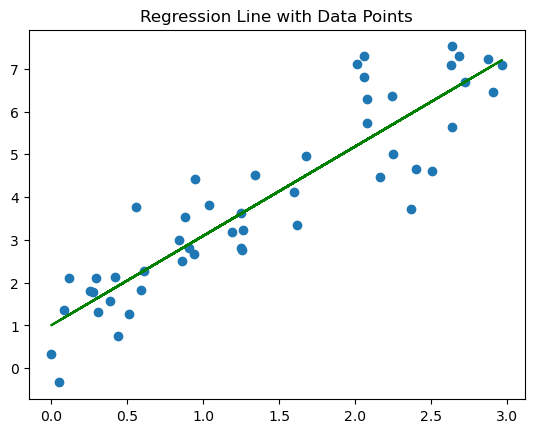

In [13]:
## Q13. Generate synthetic data, fit linear regression, visualize regression line and points

# Similar to #7 but simpler visualization

np.random.seed(1)
X = 3 * np.random.rand(50, 1)
y = 1 + 2 * X + np.random.randn(50, 1)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='green')
plt.title('Regression Line with Data Points')
plt.show()